In [3]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [4]:
gdf = gpd.read_file('B002005212020DDSWC08212.zip')

In [5]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   873 non-null    object  
 1   PREF       873 non-null    object  
 2   CITY       873 non-null    object  
 3   K_AREA     873 non-null    object  
 4   S_AREA     873 non-null    object  
 5   PREF_NAME  873 non-null    object  
 6   CITY_NAME  873 non-null    object  
 7   S_NAME     873 non-null    object  
 8   KIGO_E     0 non-null      object  
 9   HCODE      873 non-null    int64   
 10  AREA       873 non-null    float64 
 11  PERIMETER  873 non-null    float64 
 12  KIHON1     873 non-null    object  
 13  DUMMY1     873 non-null    object  
 14  KIHON2     873 non-null    object  
 15  KIHON3     873 non-null    object  
 16  C1         873 non-null    int64   
 17  C2         873 non-null    int64   
 18  DUMMY2     873 non-null    object  
 19  C3         873 non-nu

In [6]:
gdf.head()

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME S_NAME  \
0  082120001101   08  212  013000010  0001101       茨城県     常陸太田市    西三町   
1  082120001102   08  212  013000020  0001102       茨城県     常陸太田市    西三町   
2  082120002101   08  212  013000030  0002101       茨城県     常陸太田市    西三町   
3  082120002102   08  212  013000040  0002102       茨城県     常陸太田市    西三町   
4  082120003101   08  212  013000050  0003101       茨城県     常陸太田市    西三町   

  KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD      X_CODE  \
0   None   8101  ...  2120001-1-01     93    28      08      212  140.520073   
1   None   8101  ...  2120001-1-02     98    38      08      212  140.520356   
2   None   8101  ...  2120002-1-01     67    28      08      212  140.520880   
3   None   8101  ...  2120002-1-02     82    34      08      212  140.521569   
4   None   8101  ...  2120003-1-01     32    18      08      212  140.522251   

      Y_CODE      KCODE1  CCODE1  \
0  36.538119  0130-00010  1-1- 1   
1  36.537347  0130-00020  1-1- 2   
2  36.536302  0130-00030  2-1- 1   
3  36.537414  0130-00040  2-1- 2   
4  36.537162  0130-00050  3-1- 1   

                                            geometry  
0  POLYGON ((140.52115 36.53870, 140.52122 36.537...  
1  POLYGON ((140.52122 36.53781, 140.52165 36.536...  
2  POLYGON ((140.52211 36.53607, 140.52175 36.536...  
3  POLYGON ((140.52213 36.53859, 140.52236 36.537...  
4  POLYGON ((140.52336 36.53671, 140.52320 36.536...  

[5 rows x 38 columns]

In [7]:
# dissolve by S_NAME and sum fields 
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

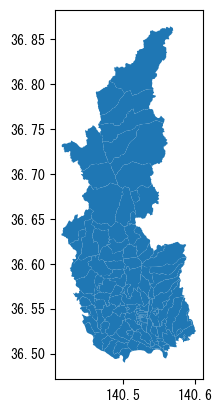

In [8]:
fig,ax = plt.subplots()
gdf.plot(ax=ax);

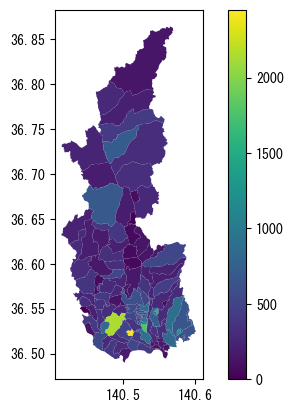

In [9]:
# population map
fig,ax = plt.subplots()
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

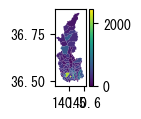

In [14]:
# population map
fig,ax = plt.subplots(figsize=(1,1))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

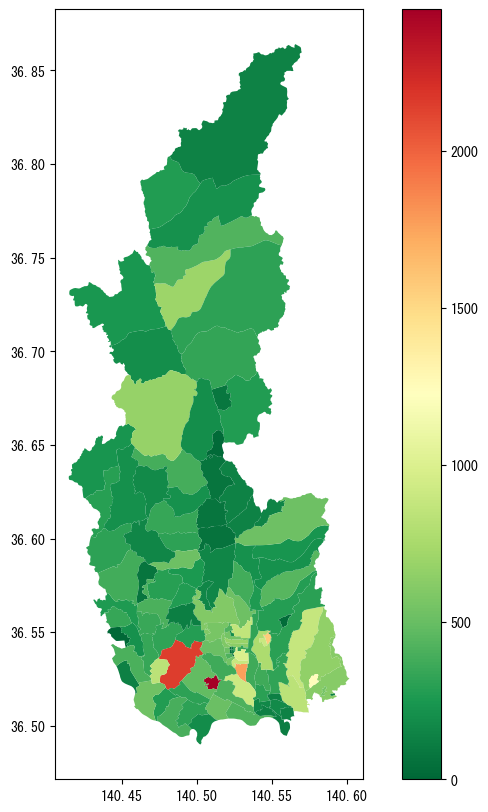

In [15]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='RdYlGn_r');

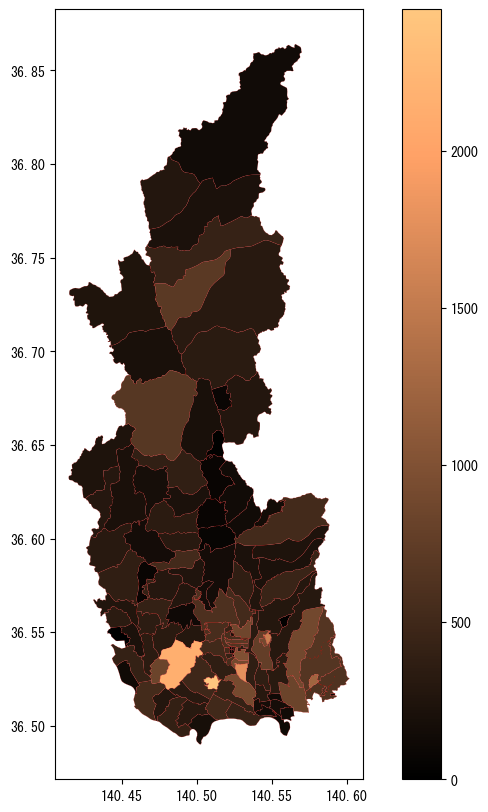

In [24]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='copper',
         edgecolor='Red',
         linewidth=0.1);

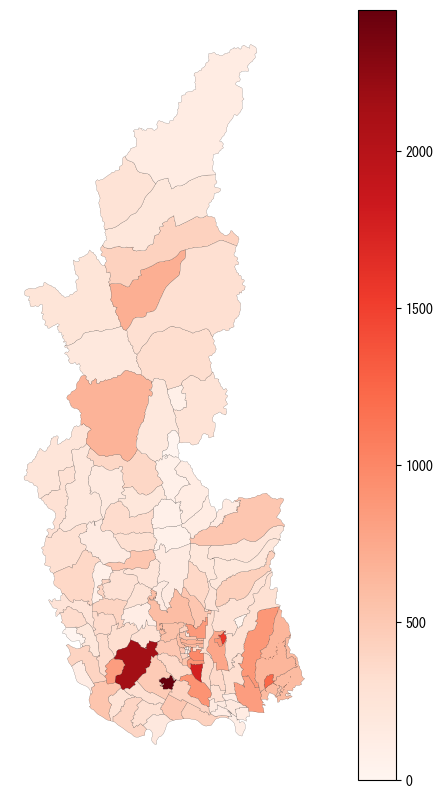

In [27]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1);

# hide axes
ax.axis('off');

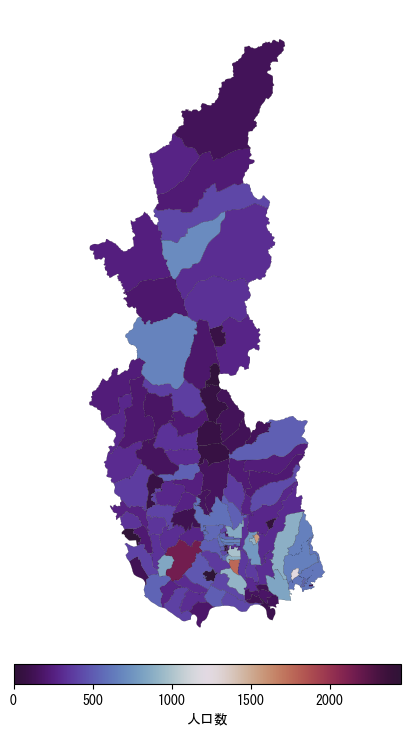

In [32]:
# population map
fig,ax = plt.subplots(figsize=(5,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='twilight_shifted',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 1, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off');

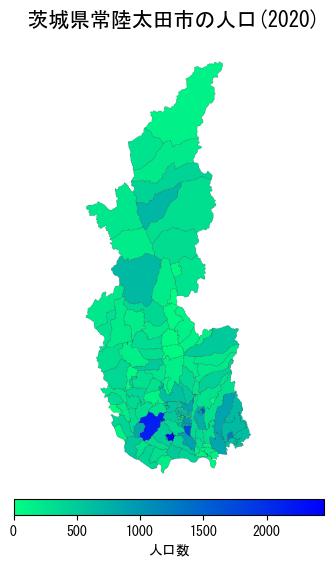

In [49]:
# population map
fig,ax = plt.subplots(figsize=(8,7))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='winter_r',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title(' 茨城県常陸太田市の人口(2020)',fontsize=15, pad=10);

In [50]:
import contextily as cx

In [51]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

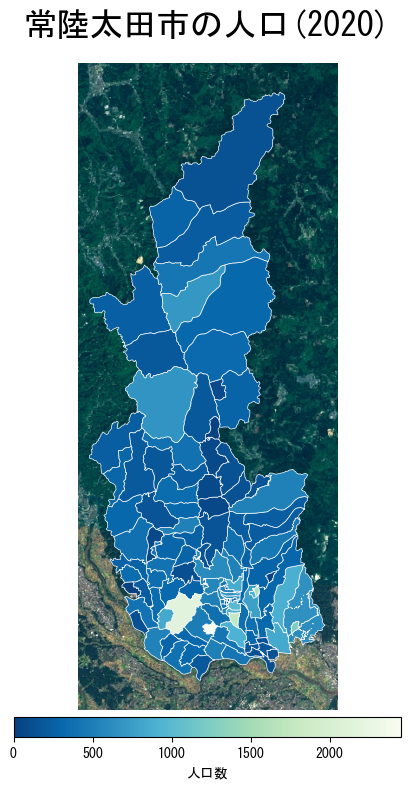

In [57]:
# population map
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='GnBu_r',
         edgecolor='white',
         linewidth=0.5,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('常陸太田市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');

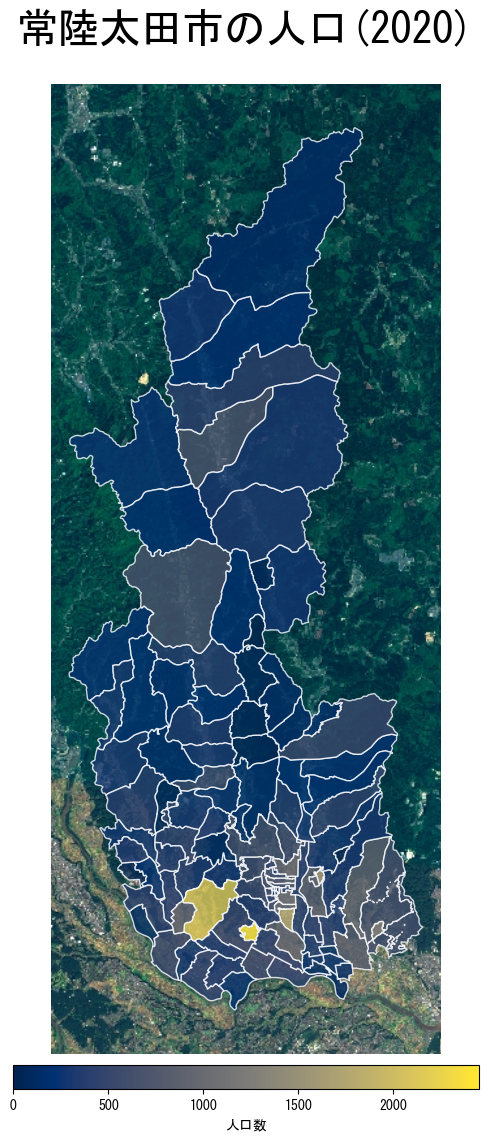

In [69]:
# population map
fig, ax = plt.subplots(figsize=(20,15))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='cividis',
         edgecolor='white',
         linewidth=1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.3, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('常陸太田市の人口(2020)', fontsize=30,pad=30)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


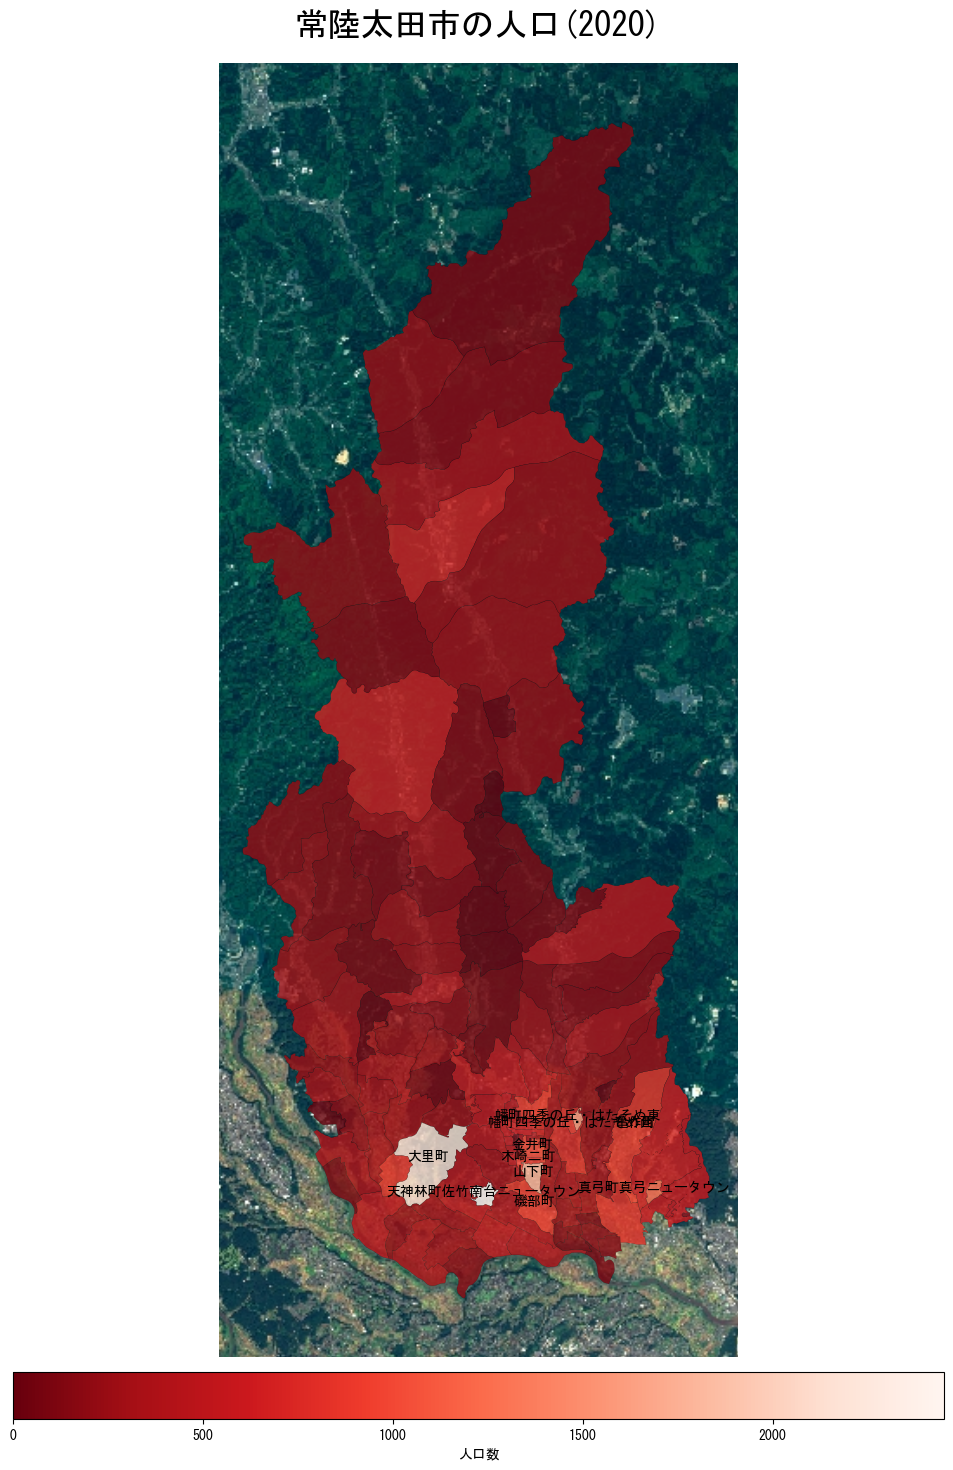

In [81]:
# population map
fig, ax = plt.subplots(figsize=(20,20))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('JINKO', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(10)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('常陸太田市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

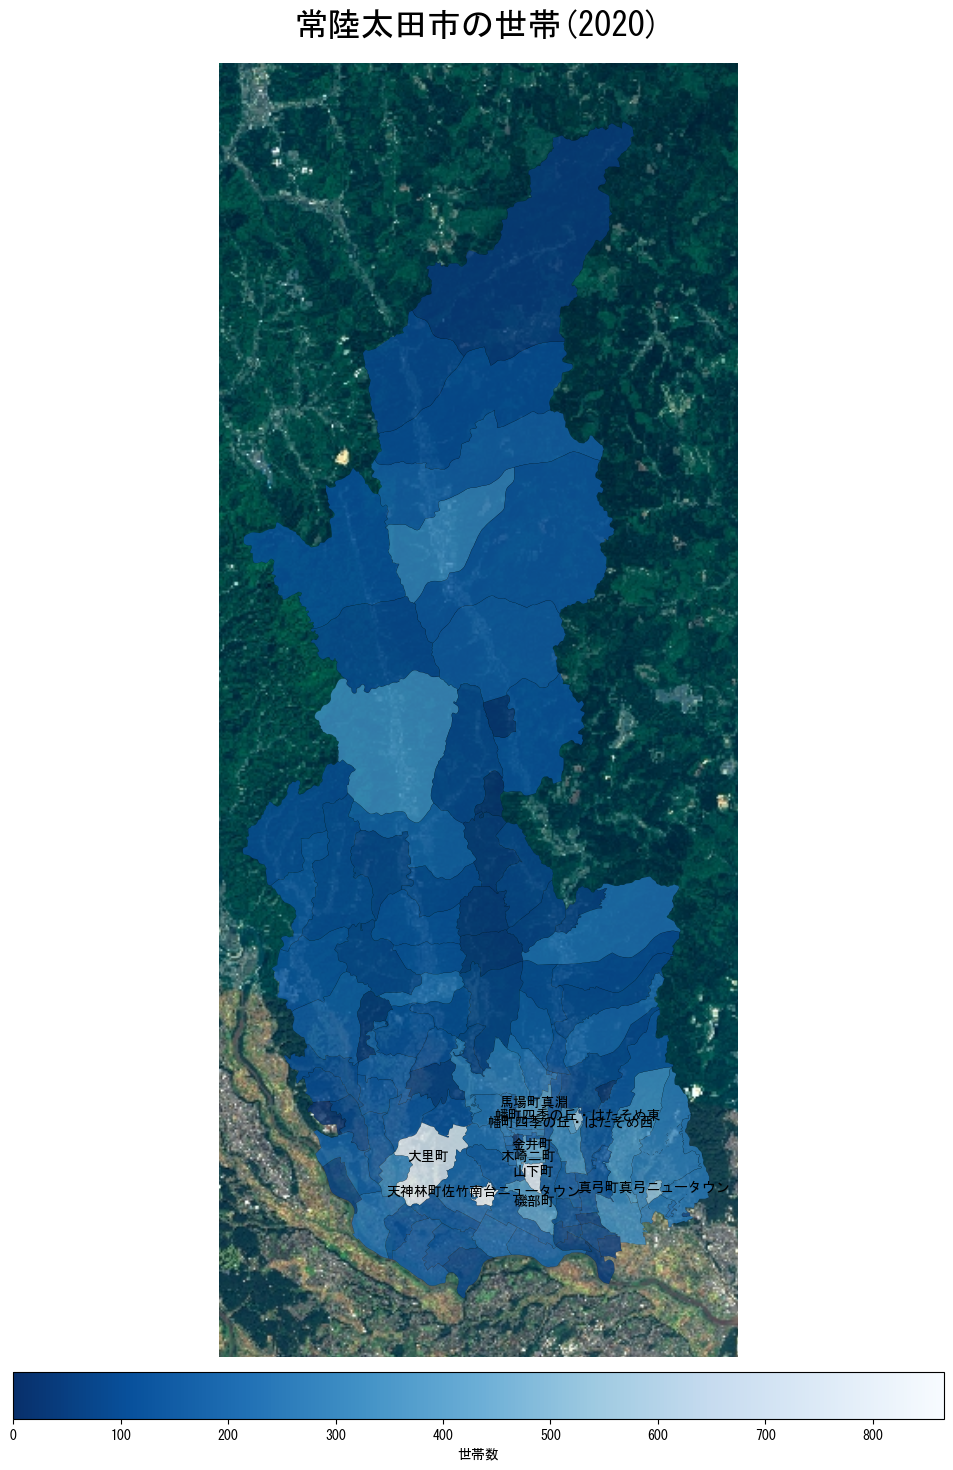

In [84]:
# population map
fig, ax = plt.subplots(figsize=(20,20))

gdf.plot(ax=ax,
         column='SETAI',
         legend=True,
         cmap='Blues_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "世帯数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('SETAI', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(10)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('常陸太田市の世帯(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

感想
　可視化すると気づくことが多い。日本全体でやってみても面白いと思った。
　大体のコードの意味が分かり、箇所箇所でいじったりし楽しかった。
　自分の町のみをラベリングしたかった。